# Data Analytics - ML25M 

In [17]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

seed = 42
np.random.seed(seed)
random.seed(seed)


## Data Acquisition

In [18]:
# Reading the csv files
movies = pd.read_csv('./ml-25m/movies.csv')
ratings = pd.read_csv('./ml-25m/ratings.csv')
tags = pd.read_csv('./ml-25m/tags.csv')
genome_scores = pd.read_csv('./ml-25m/genome-scores.csv')
genome_tags = pd.read_csv('./ml-25m/genome-tags.csv')

In [19]:
# ratings group by movieId with mean and count
grouped_ratings = ratings.groupby('movieId').agg({'rating': ['mean', 'count'], 'timestamp': ['mean']})
grouped_ratings.columns = ['rating', 'rating_count', 'mean_timestamp']
grouped_ratings = grouped_ratings.astype({'mean_timestamp': 'int'})
grouped_ratings.drop('mean_timestamp', axis=1, inplace=True)
# Dataset merge with movies and ratings, with missing rating films removed
df = pd.merge(movies, grouped_ratings, on='movieId')

display(df.head())

,movieId,title,genres,rating,rating_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,24228
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,11804
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,2523
4,5,Father of the Bride Part II (1995),Comedy,3.058434,11714


In [20]:
# Split genres into columns
genres = df['genres'].str.get_dummies(sep='|')
df = pd.concat([df, genres], axis=1)
movies_genres = df.copy()

movies_genres.drop('genres', axis=1, inplace=True)
df.drop('genres', axis=1, inplace=True)
df1= df.copy()
df.head()

,movieId,title,rating,rating_count,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),3.893708,57309,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),3.251527,24228,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),3.142028,11804,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),2.853547,2523,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),3.058434,11714,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Merge movies with genome scores
genome_scores['tag'] = genome_scores['tagId'].map(genome_tags.set_index('tagId')['tag'].to_dict())
genome_table = genome_scores.pivot_table(index='movieId', columns='tag', values='relevance')

# Merge movies with genome table
df= pd.merge(df, genome_table, on='movieId')

In [22]:

df_title = df['title']
df = df.drop(columns=['movieId', 'title'])

# from title extract year
df['year'] = df_title.str.extract('(\(\d{4}\))', expand=True)
# remove parentheses
df['year'] = df['year'].str.extract('(\d{4})', expand=True)

# remove movies with no year
df = df.dropna(subset=['year'])

# convert year to int
df['year'] = df['year'].astype(int)

In [23]:
df.to_csv('./dataset.csv', index=False)

# Data Visualization

In [8]:
print(f'Number of samples: {df.shape[0]}')
df.describe()

Number of samples: 13798


,rating,rating_count,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
count,13798.000000,13798.000000,13798.000000,13798.000000,13798.000000,13798.000000,13798.000000,13798.000000,13798.000000,13798.000000,...,13798.000000,13798.000000,13798.000000,13798.000000,13798.000000,13798.000000,13798.000000,13798.000000,13798.000000,13798.000000
mean,3.271746,1787.492680,0.046602,0.044776,0.078277,0.085590,0.129271,0.088343,0.074097,0.180562,...,0.107914,0.012538,0.035585,0.059139,0.157776,0.086679,0.192202,0.040948,0.019713,1994.397956
std,0.483867,4883.318028,0.071520,0.062635,0.111632,0.086057,0.146725,0.105217,0.100439,0.140035,...,0.310283,0.111273,0.185259,0.235893,0.364545,0.281375,0.394045,0.198177,0.139017,19.782670
min,0.899038,33.000000,0.007000,0.007250,0.006000,0.010000,0.017250,0.004250,0.004500,0.015250,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1896.000000
25%,2.986460,98.250000,0.025750,0.026750,0.028750,0.037250,0.053250,0.029500,0.024500,0.079750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986.000000
50%,3.339613,288.000000,0.033750,0.034750,0.042000,0.056000,0.078250,0.052750,0.041500,0.137625,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000
75%,3.629308,1158.000000,0.045250,0.047250,0.079500,0.102187,0.136000,0.101437,0.078750,0.235750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000
max,4.483096,81491.000000,0.999750,1.000000,0.997750,0.922000,0.988000,0.920000,0.913500,0.925500,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2019.000000


In [9]:
# mean, median, and standard deviation of ratings with two decimal places
print(f'Mean: {df["rating"].mean():.3f}')
print(f'Median: {df["rating"].median():.3f}')
print(f'Standard deviation: {df["rating"].std():.3f}')



Mean: 3.272
Median: 3.340
Standard deviation: 0.484


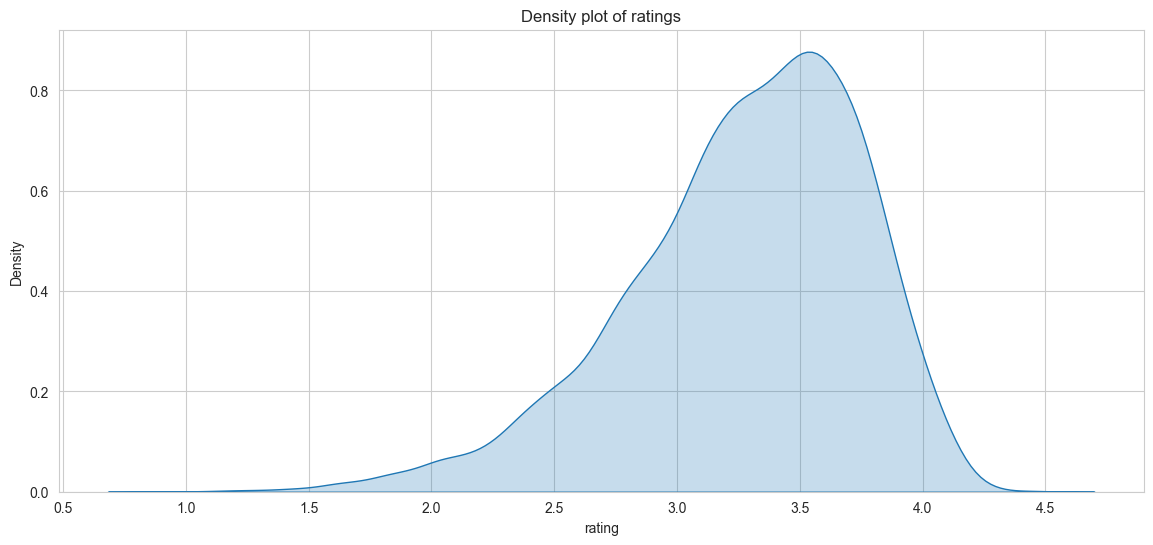

In [10]:
#density plot of ratings
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(14, 6))
sns.kdeplot(df['rating'], fill=True)

plt.title('Density plot of ratings')
plt.show()


C:\Users\franc\AppData\Local\Temp\ipykernel_2688\872514359.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['year'], palette='mako')


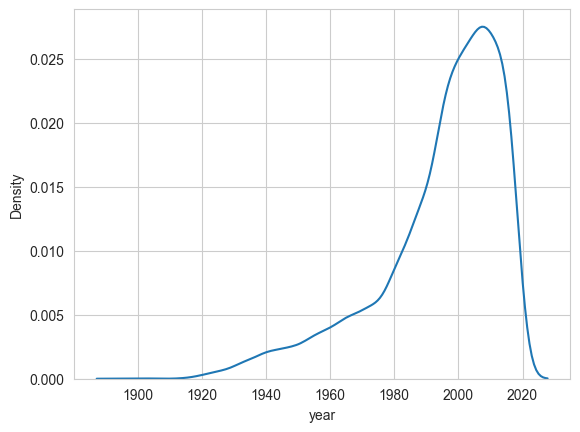

In [11]:
# density plot for film year
sns.kdeplot(df['year'], palette='mako')
plt.show()

In [12]:
#loonking for missing values and duplicates
print(f'Missing values: {df.isnull().sum().sum()}')
print(f'Duplicates: {df.duplicated().sum()}')


Missing values: 0
Duplicates: 0


In [13]:
# compare rating distribution with gaussian distribution
# Kolmogorov-Smirnov test,
# Null hypothesis: the two distributions are identical
# p-value < 0.05: reject the null hypothesis

from scipy.stats import kstest, norm




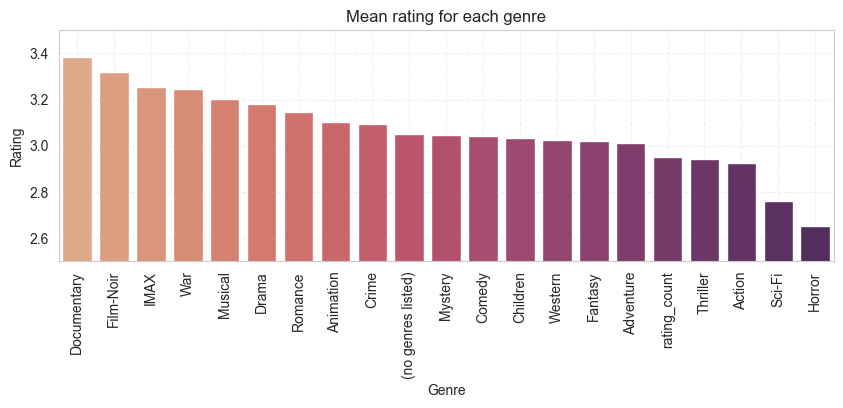

In [26]:
# mean rating for each genre
genres = movies_genres.columns[2:]
genres_rating = pd.DataFrame(columns=['genre', 'rating'])
for genre in genres:
    rating = movies_genres[movies_genres[genre] == 1]['rating'].mean()
    genres_rating = pd.concat([genres_rating, pd.DataFrame([[genre, rating]], columns=['genre', 'rating'])])

genres_rating = genres_rating[genres_rating['genre'] != 'rating']

# order the genres by rating
genres_rating = genres_rating.sort_values(by='rating', ascending=False)

# plot the mean rating for each genre
plt.figure(figsize=(10, 3))
sns.barplot(x='genre', y='rating', data=genres_rating, palette='flare')
plt.xticks(rotation=90)
plt.grid(True, zorder=1, linestyle='--', alpha=0.3)
plt.ylim(2.5, 3.5)
plt.title('Mean rating for each genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()

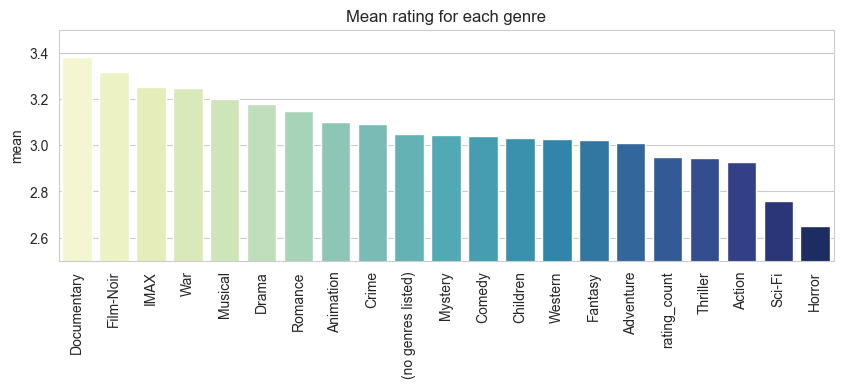

In [37]:
#mean rating for each genre
genres = movies_genres.columns[3:]
genres_mean = []
    
for genre in genres:
    genres_mean.append(movies_genres[movies_genres[genre] == 1]['rating'].mean())

genres_mean = pd.DataFrame(genres_mean, index=genres, columns=['mean'])
genres_mean.sort_values(by='mean', ascending=False, inplace=True)

#barplot of mean rating for each genre
plt.figure(figsize=(10, 3))
sns.barplot(x=genres_mean.index, y=genres_mean['mean'], palette='YlGnBu')
plt.ylim(2.5, 3.5)
plt.title('Mean rating for each genre')
plt.xticks(rotation=90)
plt.show()



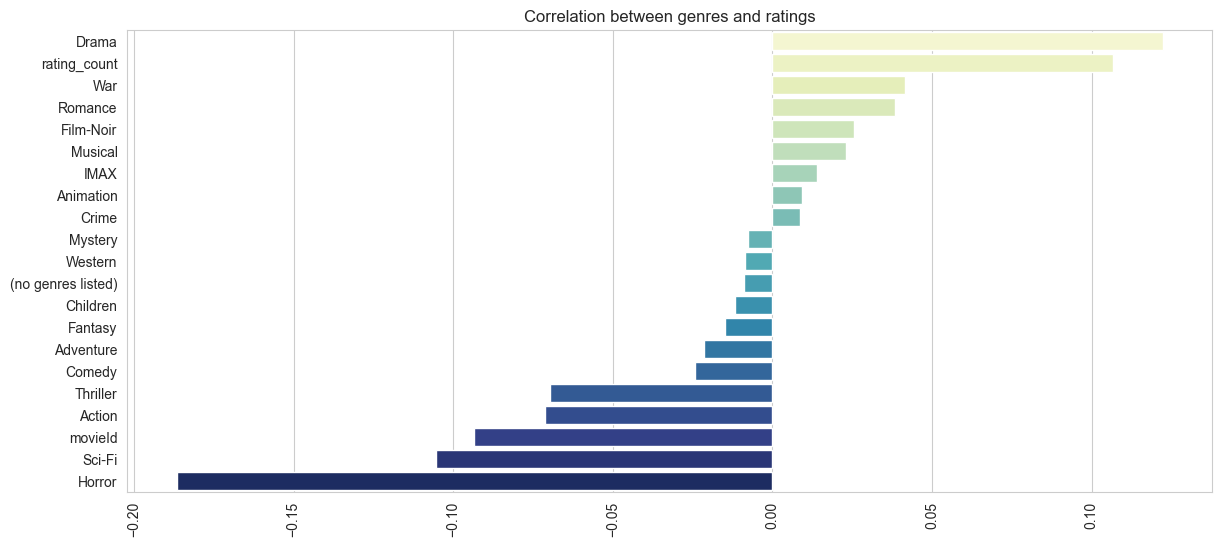

In [28]:
#calculate the correlation between genres and ratings

corr = movies_genres.corr(numeric_only=True)
corr = corr['rating'].sort_values(ascending=False)
corr = corr[2:]
#barplot of correlation between genres and ratings
plt.figure(figsize=(14, 6))
sns.barplot(x=corr.values, y=corr.index, palette='YlGnBu')
plt.title('Correlation between genres and ratings')
plt.xticks(rotation=90)
plt.show()


In [38]:
## Correlation between tags and ratings
# features correlation
corre = df.corr()
corre = corre['rating'].sort_values(ascending=False)
corre = corre.drop('rating')




C:\Users\franc\AppData\Local\Temp\ipykernel_2688\3419799253.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


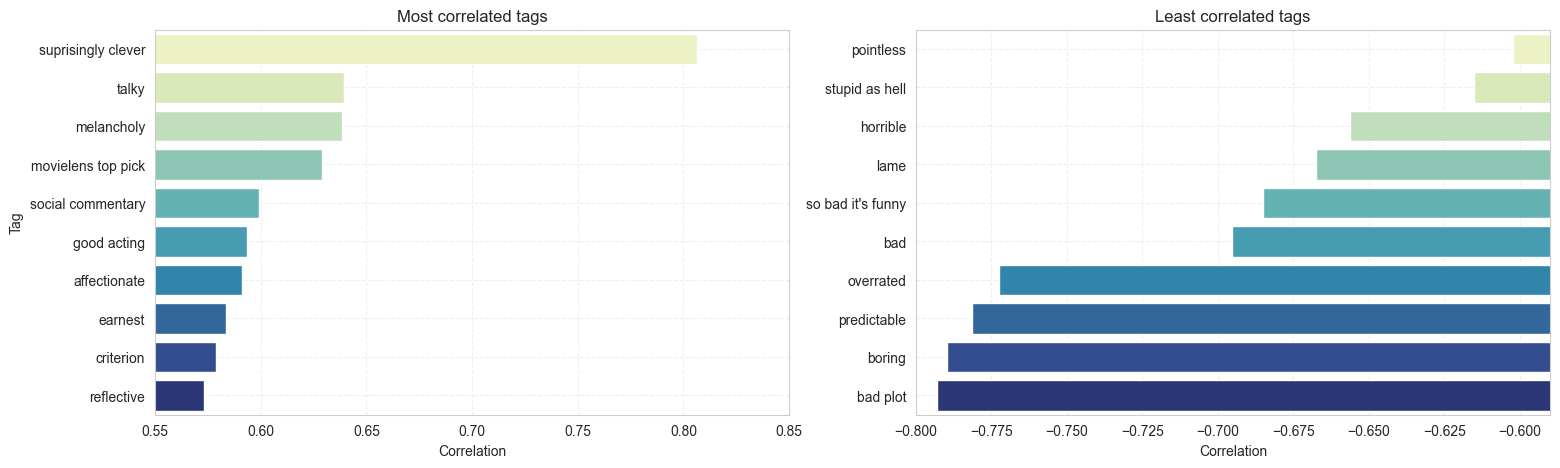

In [39]:
plt.subplots(figsize=(18, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=corre.values[:10], y=corre.index[:10], palette='YlGnBu', zorder=2)
plt.grid(True, zorder=-1, linestyle='--', alpha=0.3)
plt.title('Most correlated tags')
plt.xlabel('Correlation')
plt.ylabel('Tag')
plt.xlim(0.55, 0.85)

plt.subplot(1, 2, 2)
sns.barplot(x=corre.values[-10:], y=corre.index[-10:], palette='YlGnBu', zorder=2)
plt.grid(True, zorder=-1, linestyle='--', alpha=0.3)
plt.title('Least correlated tags')
plt.xlabel('Correlation')
plt.xlim(-.8, -0.59)
plt.ylabel('')
plt.show()


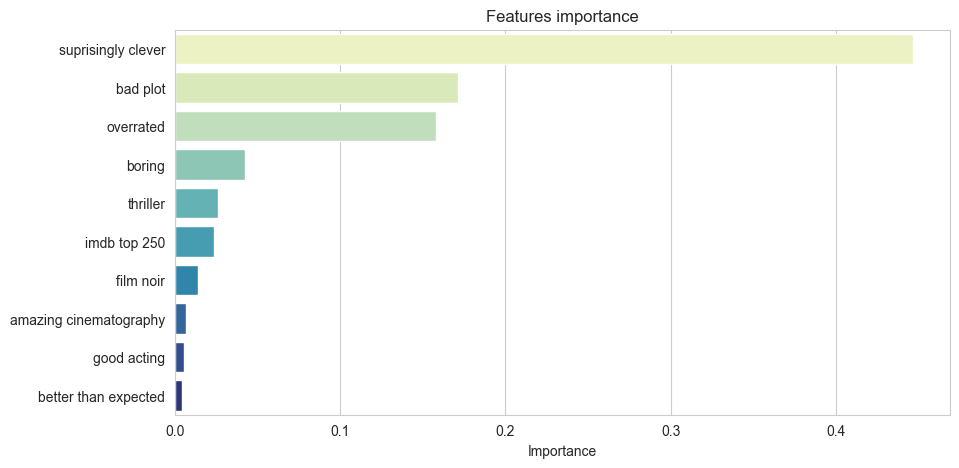

In [40]:
#calculate the features importance
from sklearn.ensemble import RandomForestRegressor

X = df.drop('rating', axis=1)
y = df['rating']

rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X, y)

importance = rf.feature_importances_

# sort the features by importance
indices = np.argsort(importance)[::-1]
features = X.columns[indices]
indices = indices[:10]
features = features[:10]
# plot the features importance
plt.figure(figsize=(10, 5))
plt.title('Features importance')
sns.barplot(x=importance[indices], y=features, palette='YlGnBu')
plt.xlabel('Importance')
#plt.xlim([-1, X.shape[1]])
plt.show()


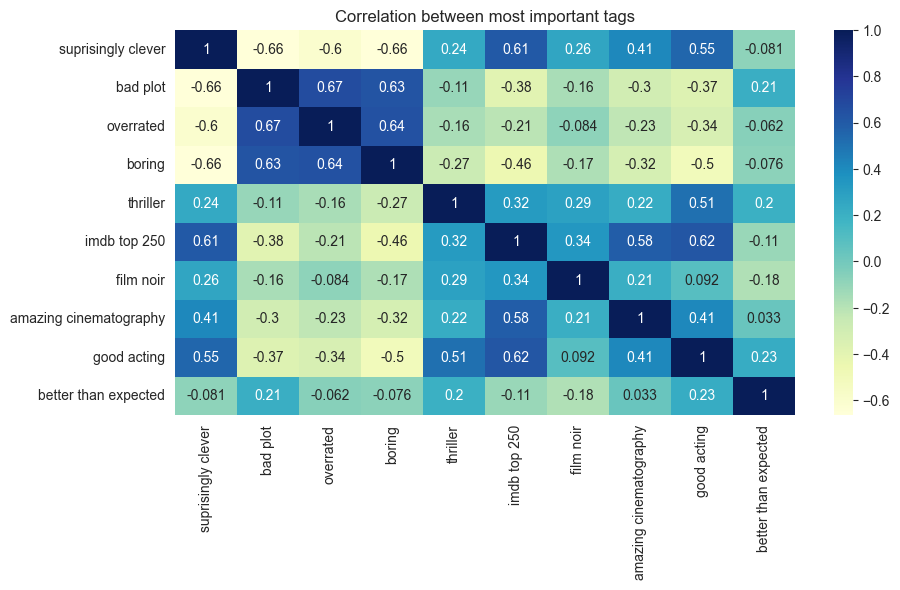

In [41]:
plt.figure(figsize=(10, 5))
sns.heatmap(df[features].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation between most important tags')
plt.show()

In [ ]:
#split df in train e test set

from sklearn.model_selection import train_test_split

X = df.drop('rating', axis=1)
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)



Perplexity: 5
Perplexity: 30
Perplexity: 50
Perplexity: 100


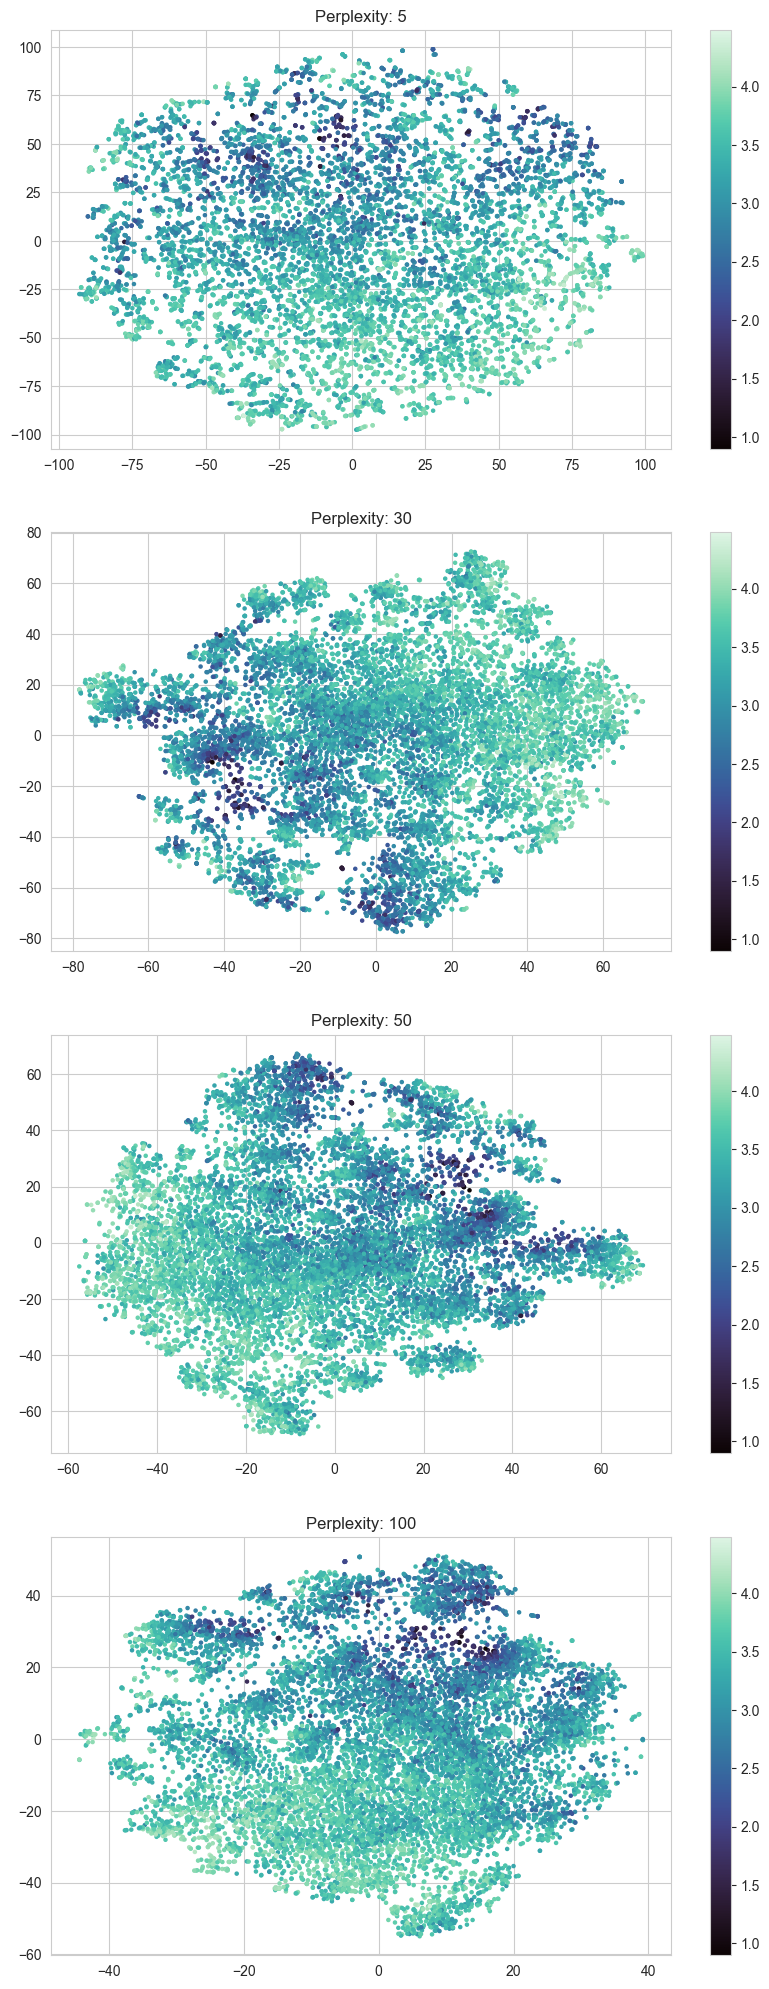

In [ ]:
# get i as index of dataset with transform = L2_normalization, threshold = 0, year = True, tags = True, genres = True, pca = False
from sklearn.manifold import TSNE


perplexities = [5, 30, 50, 100]
tsne = [None] * len(perplexities)
X_train_TSNE = [None] * len(perplexities)
for i, p in enumerate(perplexities):
    print('Perplexity: {}'.format(p))
    tsne[i] = TSNE(n_components=2, init='random', random_state=42, perplexity=p)
    tsne[i] = tsne[i].fit(X_train)
    X_train_TSNE[i] = tsne[i].fit_transform(X_train)

fig, axs = plt.subplots(len(perplexities), 1, figsize=(10, 25))
for i, p in enumerate(perplexities):
    fig.colorbar(axs[i].scatter(X_train_TSNE[i][:, 0], X_train_TSNE[i][:, 1], c=y_train, cmap='mako', s=5), ax=axs[i])
    axs[i].set_title('Perplexity: {}'.format(p))
plt.show()